# **Analisis pola cuaca dan dampaknya pada hasil panen beras di daerah Sumatera**

**Nama : Alvin Abner Tumaliang**

**NIM : 202410103045**

**Kelas : Data Visualization A**

Pulau Sumatera memiliki lebih dari separuh luas lahannya yang dapat digunakan untuk pertanian di masing-masing provinsi, dengan padi sebagai komoditas pangan utama. Selain padi, komoditas lain yang dihasilkan mencakup jagung, kacang tanah, dan ubi jalar. Namun, hasil pertanian di wilayah ini sangat rentan terhadap perubahan iklim, yang dapat berdampak negatif pada pola tanam, waktu tanam, jumlah produksi, serta kualitas hasil panen. Dampak pemanasan global, seperti meningkatnya suhu bumi, perubahan pola curah hujan, penguapan, aliran air, kelembaban tanah, serta fluktuasi iklim yang ekstrem, turut menjadi ancaman bagi keberhasilan sektor pertanian.

Informasi ini merupakan hasil catatan dari tahun 1993 hingga 2020 yang mencakup delapan provinsi di Daerah pulau Sumatera, yaitu Nanggroe Aceh Darussalam, Sumatera Utara, Sumatera Barat, Riau, Jambi, Sumatera Selatan, Bengkulu, dan Lampung.

# 1. Load Dataset

Pertama kita mengimport beberapa package python untuk membantu kita dalam memvisualisasikan data dari dataset yang kita dapat. Kita mengimport numpy, pandas, matplotlib.pyplot dan seaborn

In [2]:
#import library package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Kemudian kita menyimpan dataset kita dalam variabel "data" untuk mempermudah pemanggilan

In [5]:
data = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')
data

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


# 2. Cleaning Dataset
Mengecek baris dan kolom dalam dataset

In [6]:
#check row and column
data.shape

(224, 7)

Membersihkan data yang terduplikasi

In [33]:
dup_rows = data.duplicated().sum()
dup_rows

np.int64(0)

Mendrop tabel/data yang duplikat

In [36]:
data = data.drop_duplicates()
data

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


Ada total data yaitu 224 dengan tiap provinsi memiliki 28 data.

Dalam dataset tersebut memiliki 7 kolom dengan isi yaitu:
1. **Province**: Nama provinsi
2. **Year**: Tahun produksi beras
3. **Production**: Hasil produksi atau hasil panen tahunan dalam satuan ton
4. **Land Area**: Luas daerah pertanian dalam satuan hektar
5. **Rainfall**: Jumlah rata-rata curah hujan dalam setahun dengan satuan milimeter
6. **Humidity**: Tingkat kelembapan rata-rata dalam setahun dengan satuan persen
7. **Average Temperature**: Suhu rata-rata dalam setahun dengan satuan celsius

Kemudian setelah itu kita akan melihat kembali kolom dan tipe data yang digunakan pada masing-masing kolom

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


# 3. Eksplorasi Data

**Akan menggunakan 2 metode analisis. Yaitu Analisis Statistik Deskriptif dan Analisis Korelasi**

Melihat data yang kosong / "null" untuk mengetahui apakah masih ada data yang kosong

In [8]:
data.isnull().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

**1. Analisis statistik deskriptif**


In [9]:
#statistic data overview
data.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


Rata-rata hasil panen di 8 provinsi selama 28 tahun sebesar 1.679.701 ton dengan hasil panen terendah sebesar 42.938 ton dan tertinggi sebesar 4.881.089 ton. Juga untuk rata-rata luas lahan pertanian sebesar 374.350 hektar.

Dari penjelasan uraian data di atas, dapat dilihat bahwa nilai mean dan median masing-masing data tidak jauh berbeda. Sehingga dapat dikatakan data berdistribusi normal.

### Membuat visualisasi interaktif dengan plotly.express untuk mengetahui total jumlah produksi terbanyak masing-masing daerah

In [116]:
import plotly.express as px

dfg = data[['Provinsi','Tahun', 'Produksi']]
dfg = dfg.groupby(['Provinsi','Produksi']).count().reset_index()
dfg.rename(columns = {"Tahun": "Total"}, inplace=True)
dfg = dfg.groupby(['Provinsi']).mean().reset_index()
fig = px.bar(dfg, x="Provinsi", y="Total")
             
fig = px.bar(dfg, x='Provinsi', y='Produksi', 
             template = "plotly_white", 
             color_discrete_sequence=px.colors.diverging.PRGn
             )
fig.update_layout(
    title="Rata-rata hasil panen tiap daerah"
    ,xaxis_title="Provinsi"
    ,yaxis_title="Produksi")

fig.show()

Dari visualisasi data diatas, dapat dilihat bahwa Sumatera Utara merupakan daerah penghasil produksi panen beras tertinggi. Dan untuk provinsi Riau adalah daerah dengan produksi panen beras terendah.

In [44]:
pd.pivot_table(data,index=['Provinsi'],values=['Produksi'], aggfunc=np.mean)

C:\Users\User\AppData\Local\Temp\ipykernel_7492\659015857.py:1: FutureWarning: The provided callable <function mean at 0x00000140EA94C4A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(data,index=['Provinsi'],values=['Produksi'], aggfunc=np.mean)


,Produksi
Provinsi,
Aceh,1.618737e+06
Bengkulu,4.449648e+05
Jambi,5.528638e+05
Lampung,2.444068e+06
Riau,4.074645e+05
Sumatera Barat,1.990396e+06
Sumatera Selatan,2.648643e+06
Sumatera Utara,3.330471e+06


C:\Users\User\AppData\Local\Temp\ipykernel_7492\1454086692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tahun',y='Produksi',data=data,palette='rocket')


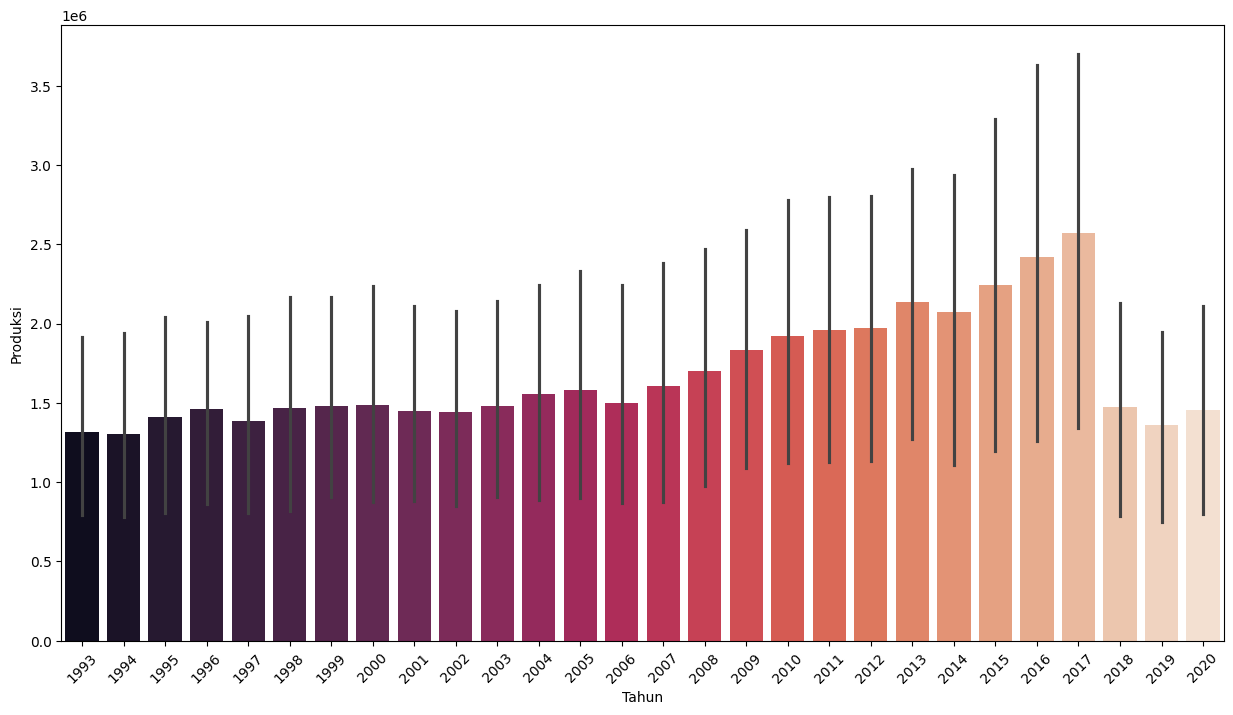

In [51]:
plt.figure(figsize=(15,8))
sns.barplot(x='Tahun',y='Produksi',data=data,palette='rocket')
plt.xticks(rotation=45)
plt.show()


Dari visualisasi di atas, produksi tertinggi tercatat pada tahun 2017, tetapi di tahun-tahun berikutnya terjadi penurunan yang cukup signifikan yaitu 2018 sampai 2020.

**2. Analisis Korelasi**

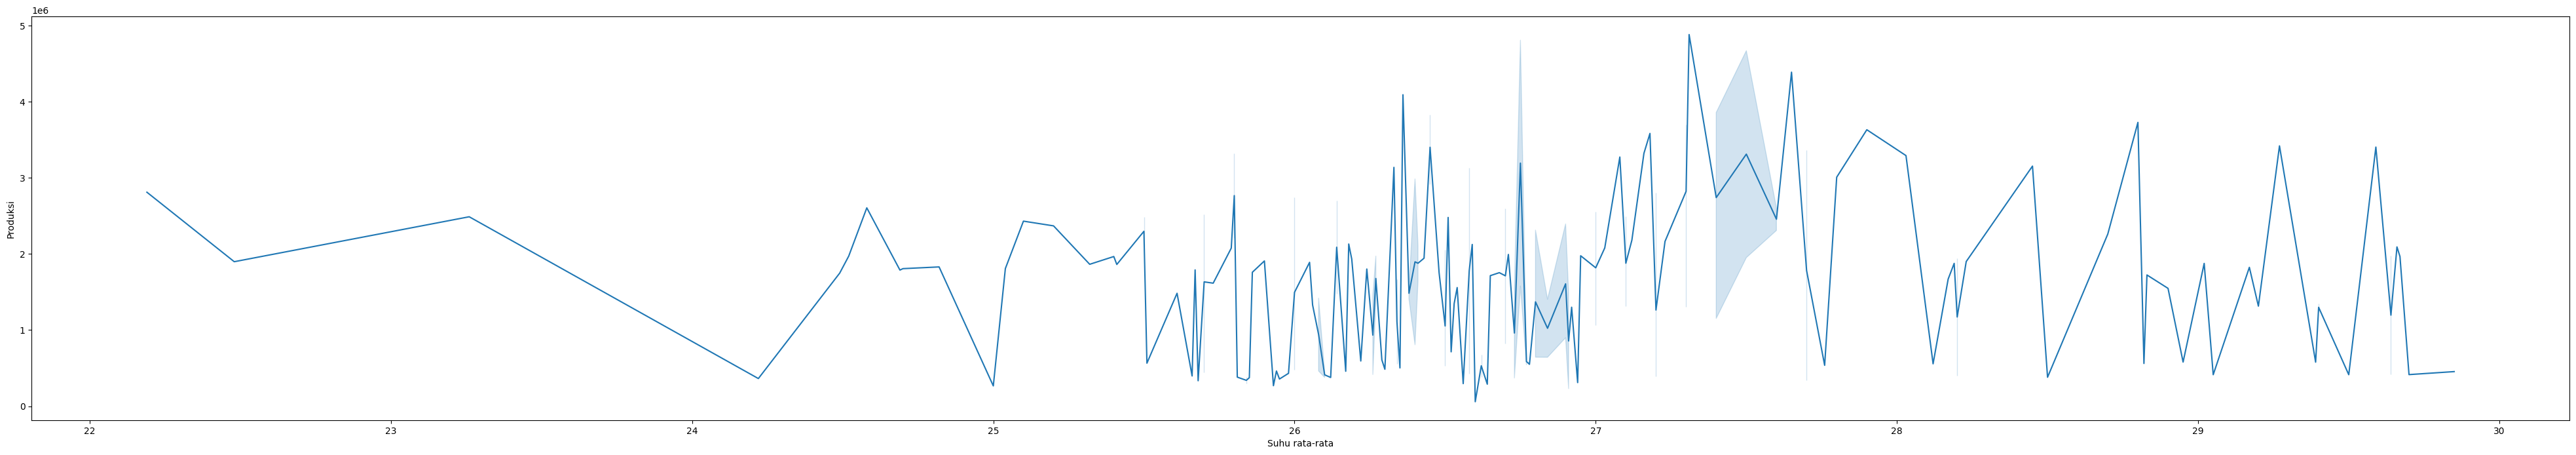

In [59]:
plt.figure(figsize=(50,8))
sns.lineplot(x=data['Suhu rata-rata'],y=data['Produksi'])
plt.show()

Dari grafik di atas, dapat dilihat bahwa produksi tertinggi tercapai saat suhu rata-rata berada dalam rentang 27-28 derajat Celsius.

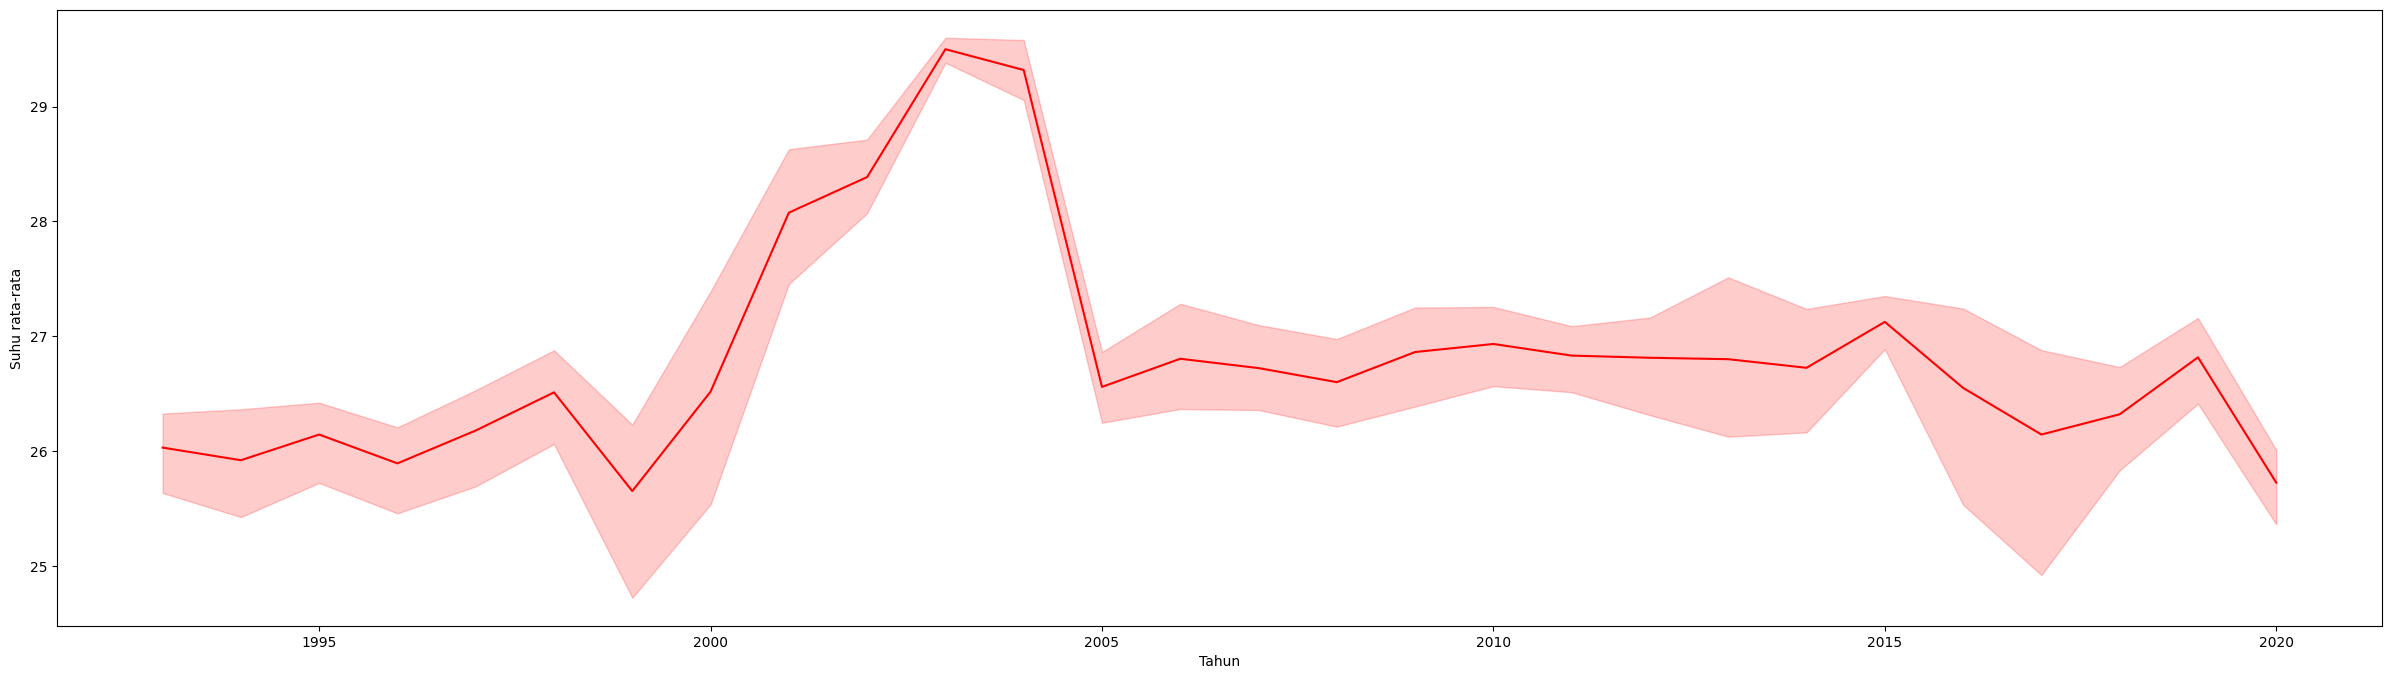

In [128]:
plt.figure(figsize=(30,8))
sns.lineplot(x=data['Tahun'],y=data['Suhu rata-rata'], color='red')
plt.show()

Rata-rata suhu tertinggi pernah dicapai pada tahun 2000-2005, yaitu lebih dari 29 derajat Celsius, namun pada tahun-tahun berikutnya cenderung stabil pada kisaran suhu 27 derajat Celsius.

**Melihat visualisasi korelasi antara data produksi dan curah hujan**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


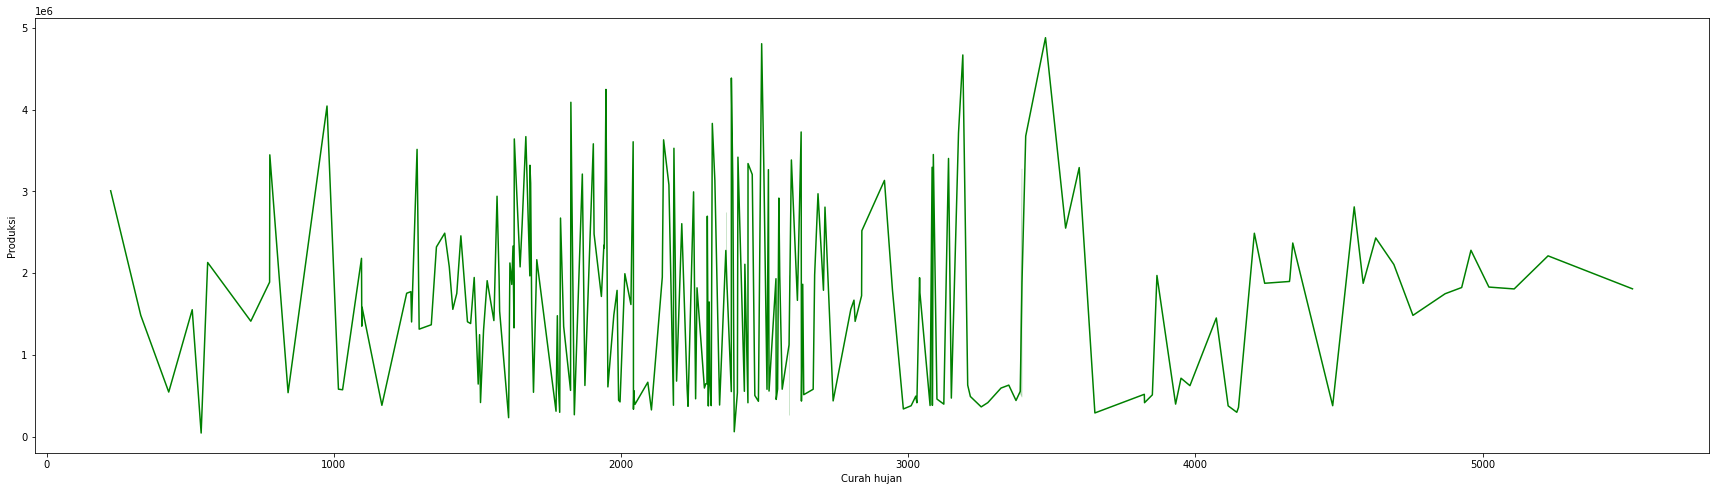

In [12]:
plt.figure(figsize=(30,8))
sns.lineplot(data['Curah hujan'],data["Produksi"], color='green')
plt.show()

Dari visualisasi di atas, didapatkan bahwa produksi akan lebih stabil pada curah hujan sedang, yaitu sekitar 2500 mm per tahun. Dan produksi akan melambat/sedikit pada curah hujan tinggi atau diatas 4000 mm per tahun.

**Melihat visualisasi korelasi antara data produksi dengan tingkat kelembapan**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


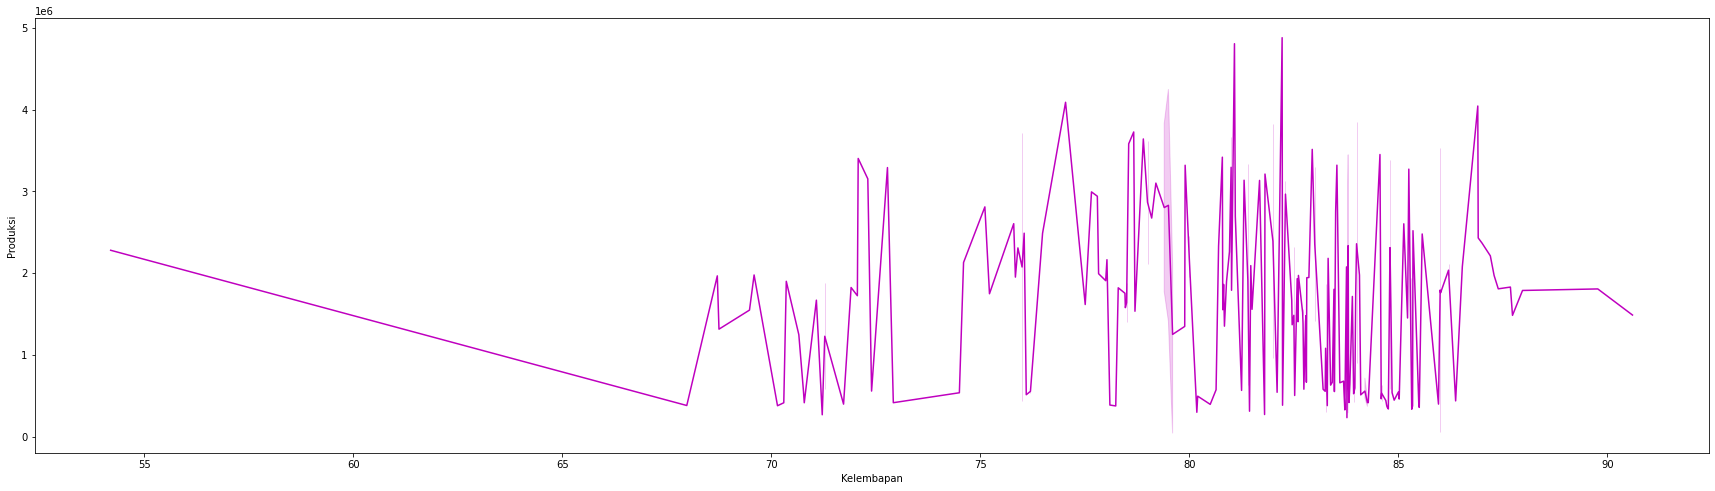

In [13]:
plt.figure(figsize=(30,8))
sns.lineplot(data['Kelembapan'],data['Produksi'], color='m')
plt.show()

Dapat dilihat dari visualisasi tersebut bahwa pada tingkat persentasi kelembapan udara 80% - 85%, produksi akan lebih stabil. Sedangkan produksi akan melemah pada kelembapan diatas 85%. Pada tingkat dibawah 80%, produksi akan menjadi tidak stabil.

Based on the purpose of this notebook, the attribute that will be the output is the harvest (column = Production).

**a. Distribution of production quantities**

In [61]:
#statistical plot
import scipy.stats as stats
import pylab as py

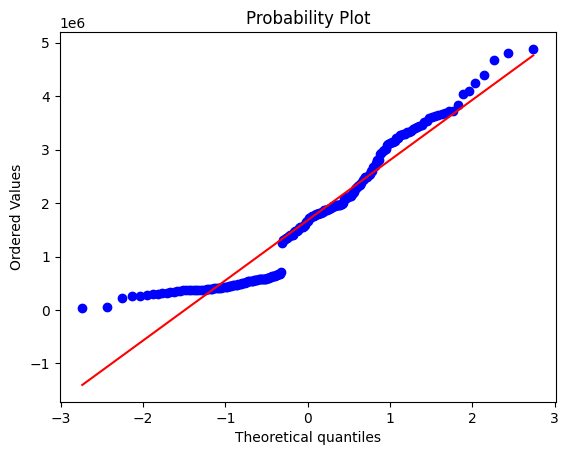

In [62]:
#QQ-plot (Quantile-Quantile Plot)
stats.probplot(data['Produksi'], dist='norm', plot=py)
py.show()

Plot di atas menunjukkan bagaimana data terdistribusi dari variabel **Produksi**. Plot di atas merupakan plot nilai kuantil teoritis dengan nilai kuantil variabel terpilih yaitu **Produksi**. Jadi, plot akan menggambarkan berapa banyak nilai dalam suatu distribusi yang berada di atas atau di bawah batas tertentu. 

Dari hasil plot di atas, diperoleh garis cenderung lurus, yang berarti secara keseluruhan distribusi data variabel tersebut cenderung normal.

**Matriks korelasi antara data variabel numerik**

Mengecek kolom yang ada dalam dataset

In [65]:
data.columns

Index(['Provinsi', 'Tahun', 'Produksi', 'Luas Panen', 'Curah hujan',
       'Kelembapan', 'Suhu rata-rata'],
      dtype='object')

In [76]:
#change the column order
cols = list(data.columns)

df = data.copy()
df = df[cols[0:2] + cols[3:7] + [cols[2]]]
df.tail()

,Provinsi,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
219,Lampung,2016,390799.00,2317.6,79.40,26.45,3831923.00
220,Lampung,2017,396559.00,1825.1,77.04,26.36,4090654.00
221,Lampung,2018,511940.93,1385.8,76.05,25.50,2488641.91
222,Lampung,2019,464103.42,1706.4,78.03,27.23,2164089.33
223,Lampung,2020,545149.05,2211.3,75.80,24.58,2604913.29


In [83]:
df.loc[:, 'Luas Panen':'Produksi'].corr()

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
Luas Panen,1.000000,-0.092975,-0.061121,0.115726,0.905622
Curah hujan,-0.092975,1.000000,0.056466,-0.228699,-0.042129
Kelembapan,-0.061121,0.056466,1.000000,-0.407799,-0.052316
Suhu rata-rata,0.115726,-0.228699,-0.407799,1.000000,0.041160
Produksi,0.905622,-0.042129,-0.052316,0.041160,1.000000


Note:
- Korelasi >= 0,5 berarti ada hubungan yang erat antara variabel
- Korelasi < 0,5 berarti tidak ada hubungan yang erat antara variabel

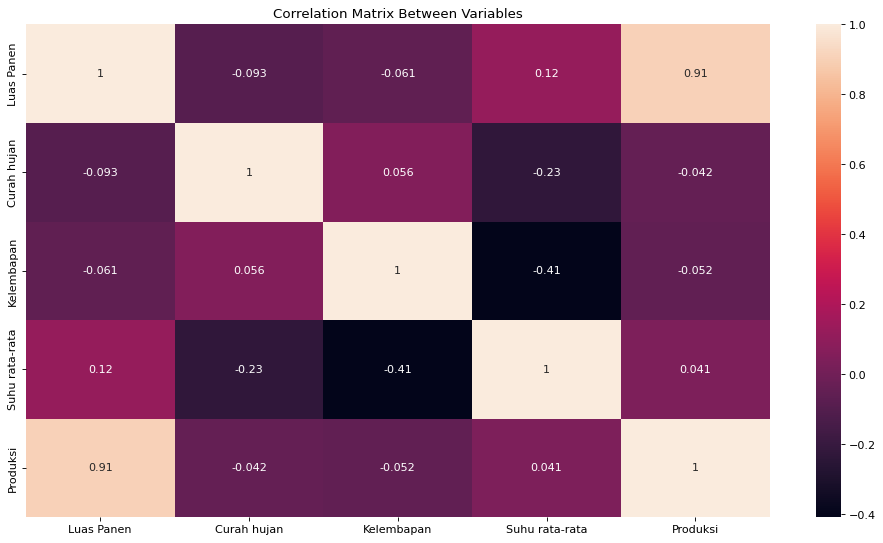

In [78]:
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.heatmap(df.loc[:, 'Luas Panen':'Produksi'].corr(), cmap='rocket', annot=True)
plt.title('Correlation Matrix Between Variables')
plt.show()

Dari matriks korelasi di atas, dapat diketahui jenis korelasi antara variabel.

Luas lahan pertanian / luas panen dan suhu rata-rata memiliki nilai korelasi positif, artinya apabila nilai variabel tersebut semakin besar maka produksi juga akan meningkat, walaupun tidak signifikan (pengaruh suhu).

Sedangkan variabel curah hujan dan kelembaban memiliki nilai korelasi negatif dengan variabel produksi, artinya apabila kedua variabel tersebut semakin kecil maka produksi akan meningkat, walaupun hubungannya tidak begitu kuat.